In [1]:
from numpy import *
import pandas as pd
import pylab as p
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import vaex
import csv
from scipy.stats import norm #for gaussian
import os
from tqdm import tqdm
import subprocess as sub

# Compare the results of different FOF_b and FOF_f

## Read the file

In [3]:
varyfb = '/net/virgo01/data/users/virgini/rockstar/RC3/output/'
hdr_par = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'p_id', 'as_int_id', 'int_id', 'ext_id']
hdr_sub = ['id', 'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax', 'vrms',\
           'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'E', 'Spin', \
           'PosUncertainty', 'VelUncertainty', 'bulk_vx', 'bulk_vy', 'bulk_vz',\
           'BulkVelUnc', 'n_core', 'm200b', 'm200c', 'm500c', 'm2500c',\
           'Xoff', 'Voff', 'spin_bullock', 'b_to_a', 'c_to_a', \
           'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', \
           'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'Rs', 'Rs_Klypin', 'T/|U|',\
           'M_pe_Behroozi', 'M_pe_Diemer', 'idx', 'i_so', 'i_ph', 'num_cp', 'mmetric']

output_1 = 'b05-f40-n10-t70'
output_2 = 'b05-f80-n10-t70'
output_3 = 'b20-f40-n10-t70'
output_4 = 'b20-f80-n10-t70'
output_7 = 'b05-f40-n10-t0'
output_8 = 'b20-f80-n10-t0'

tmp_par1 = os.path.join(varyfb + output_1 + '-particles')
tmp_par2 = os.path.join(varyfb + output_2 + '-particles')
tmp_par3 = os.path.join(varyfb + output_3 + '-particles')
tmp_par4 = os.path.join(varyfb + output_4 + '-particles')
tmp_par7 = os.path.join(varyfb + output_7 + '-particles')
tmp_par8 = os.path.join(varyfb + output_8 + '-particles')

df_par1 = pd.read_csv(tmp_par1, comment='#', sep=' ', names=hdr_par)
df_par2 = pd.read_csv(tmp_par2, comment='#', sep=' ', names=hdr_par)
df_par3 = pd.read_csv(tmp_par3, comment='#', sep=' ', names=hdr_par)
df_par4 = pd.read_csv(tmp_par4, comment='#', sep=' ', names=hdr_par)
df_par7 = pd.read_csv(tmp_par7, comment='#', sep=' ', names=hdr_par)
df_par8 = pd.read_csv(tmp_par8, comment='#', sep=' ', names=hdr_par)

df1 = df_par1[(df_par1.as_int_id == df_par1.int_id) & (df_par1.ext_id != -1)]
df2 = df_par2[(df_par2.as_int_id == df_par2.int_id) & (df_par2.ext_id != -1)]
df3 = df_par3[(df_par3.as_int_id == df_par3.int_id) & (df_par3.ext_id != -1)]
df4 = df_par4[(df_par4.as_int_id == df_par4.int_id) & (df_par4.ext_id != -1)]
df7 = df_par7[(df_par7.as_int_id == df_par7.int_id) & (df_par7.ext_id != -1)]
df8 = df_par8[(df_par8.as_int_id == df_par8.int_id) & (df_par8.ext_id != -1)]

name_1 = output_1.replace('-n10-t70', '')
name_2 = output_2.replace('-n10-t70', '')
name_3 = output_3.replace('-n10-t70', '')
name_4 = output_4.replace('-n10-t70', '')
name_7 = output_7.replace('-n10-t0', '')
name_8 = output_8.replace('-n10-t0', '')

tmp_sub1 = os.path.join(varyfb + output_1 + '-halo')
tmp_sub2 = os.path.join(varyfb + output_2 + '-halo')
tmp_sub3 = os.path.join(varyfb + output_3 + '-halo')
tmp_sub4 = os.path.join(varyfb + output_4 + '-halo')
tmp_sub7 = os.path.join(varyfb + output_7 + '-halo')
tmp_sub8 = os.path.join(varyfb + output_8 + '-halo')

df_sub1 = pd.read_csv(tmp_sub1, comment='#', sep=' ', names=hdr_sub)
df_sub2 = pd.read_csv(tmp_sub2, comment='#', sep=' ', names=hdr_sub)
df_sub3 = pd.read_csv(tmp_sub3, comment='#', sep=' ', names=hdr_sub)
df_sub4 = pd.read_csv(tmp_sub4, comment='#', sep=' ', names=hdr_sub)
df_sub7 = pd.read_csv(tmp_sub7, comment='#', sep=' ', names=hdr_sub)
df_sub8 = pd.read_csv(tmp_sub8, comment='#', sep=' ', names=hdr_sub)

tmp_tree_12 = os.path.join(varyfb + 'tree-' + name_1 + '-' + name_2 + '.pdf')
tmp_tree_13 = os.path.join(varyfb + 'tree-' + name_1 + '-' + name_3 + '.pdf')
tmp_tree_14 = os.path.join(varyfb + 'tree-' + name_1 + '-' + name_4 + '.pdf')
tmp_tree_78 = os.path.join(varyfb + 'tree-' + name_7 + '-' + name_8 + '.pdf')


## The loop

In [3]:
# 1 and 2
tmp_com_12 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_2)
with open(tmp_com_12, 'w') as com_12:
    wr = csv.writer(com_12, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_1])
    wr.writerow(['#output_2:', output_2])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df1.ext_id)), desc='Loading...'):
        for j in range(max(df2.ext_id)):
            arr1 = array(df1.p_id[df1.ext_id == i])
            arr2 = array(df2.p_id[df2.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_12.close()

Loading...: 100%|██████████| 243/243 [01:03<00:00,  3.92it/s]


In [92]:
# 2 and 1
tmp_com_21 = os.path.join(varyfb + 'common-' + name_2 + '-' + name_1)
with open(tmp_com_21, 'w') as com_21:
    wr = csv.writer(com_21, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_1])
    wr.writerow(['#output_2:', output_2])
    wr.writerow(['#sub_id_2', 'sub_id_1', 'np_2', 'np_1', 'np_common', 'percent_2', 'percent_1'])
    for i in tqdm(range(max(df2.ext_id)), desc='Loading...'):
        for j in range(max(df1.ext_id)):
            arr1 = array(df2.p_id[df2.ext_id == i])
            arr2 = array(df1.p_id[df1.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_21.close()

Loading...: 100%|██████████| 248/248 [00:59<00:00,  4.28it/s]


In [27]:
tmp_com_13 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_3)
with open(tmp_com_13, 'w') as com_13:
    wr = csv.writer(com_13, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_1])
    wr.writerow(['#output_2:', output_3])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df1.ext_id)), desc='Loading...'):
        for j in range(max(df3.ext_id)):
            arr1 = array(df1.p_id[df1.ext_id == i])
            arr2 = array(df3.p_id[df3.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_13.close()

Loading...: 100%|██████████| 243/243 [00:11<00:00, 21.34it/s]


In [98]:
tmp_com_14 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_4)
with open(tmp_com_14, 'w') as com_14:
    wr = csv.writer(com_14, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_1])
    wr.writerow(['#output_2:', output_4])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df1.ext_id)), desc='Loading...'):
        for j in range(max(df4.ext_id)):
            arr1 = array(df1.p_id[df1.ext_id == i])
            arr2 = array(df4.p_id[df4.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_13.close()

Loading...: 100%|██████████| 243/243 [00:13<00:00, 18.15it/s]


In [ ]:
tmp_com_23 = os.path.join(varyfb + 'common-' + name_2 + '-' + name_3)
with open(tmp_com_23, 'w') as com_23:
    wr = csv.writer(com_23, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_2])
    wr.writerow(['#output_2:', output_3])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df2.ext_id)), desc='Loading...'):
        for j in range(max(df3.ext_id)):
            arr1 = array(df2.p_id[df2.ext_id == i])
            arr2 = array(df3.p_id[df3.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_23.close()

In [77]:
tmp_com_24 = os.path.join(varyfb + 'common-' + name_2 + '-' + name_4)
with open(tmp_com_24, 'w') as com_24:
    wr = csv.writer(com_24, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_2])
    wr.writerow(['#output_2:', output_4])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df2.ext_id)), desc='Loading...'):
        for j in range(max(df4.ext_id)):
            arr1 = array(df2.p_id[df2.ext_id == i])
            arr2 = array(df4.p_id[df4.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_24.close()    

Loading...: 100%|██████████| 248/248 [00:13<00:00, 18.83it/s]


In [3]:
tmp_com_34 = os.path.join(varyfb + 'common-' + name_3 + '-' + name_4)
with open(tmp_com_34, 'w') as com_34:
    wr = csv.writer(com_34, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_3])
    wr.writerow(['#output_2:', output_4])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df3.ext_id)), desc='Loading...'):
        for j in range(max(df4.ext_id)):
            arr1 = array(df3.p_id[df3.ext_id == i])
            arr2 = array(df4.p_id[df4.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_34.close()
    
print('finish')

Loading...: 100%|██████████| 35/35 [00:02<00:00, 14.00it/s]


finish


In [36]:
# 8 and 7
df1 = df8
df2 = df7
tmp_com_12 = os.path.join(varyfb + 'common-exp4-exp1')


with open(tmp_com_12, 'w') as com_12:
    wr = csv.writer(com_12, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_7])
    wr.writerow(['#output_4:', output_8])
    wr.writerow(['#sub_id_4', 'sub_id_1', 'np_4', 'np_1', 'np_common', 'percent_4', 'percent_1'])
    for i in tqdm(range(max(df1.ext_id)), desc='Loading...'):
        for j in range(max(df2.ext_id)):
            arr1 = array(df1.p_id[df1.ext_id == i])
            arr2 = array(df2.p_id[df2.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                common = len(intersect1d(arr1, arr2))
                percent_1 = int((common/len(arr1))*100)
                percent_2 = int((common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), common, percent_1, percent_2])
    com_12.close()

Loading...: 100%|██████████| 71/71 [00:35<00:00,  2.01it/s]


## Comparison 7 and 8

In [33]:
tmp_com_12 = os.path.join(varyfb + 'common-exp1-exp4')
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com_12  = pd.read_csv(tmp_com_12, sep=' ', comment='#', names=hdr_com)

df = df_com_12

In [34]:
tmp_com_12

'/net/virgo01/data/users/virgini/rockstar/RC3/output/common-exp1-exp4'

### Comparion 1 and 2

In [30]:
tmp_com_12 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_2)
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com_12  = pd.read_csv(tmp_com_12, sep=' ', comment='#', names=hdr_com)

df = df_com_12
# array(df.sub_id_1)

#choose significant commonality: 100% on both side
df[(df.percent_1 != 100) & (df.percent_2 == 100)]
# len(df[(df.percent_1 == 100) & (df.percent_2 == 100)])/len(unique(df2.ext_id))

# examine the ones that are less than 100%
# df[(df.percent_1 != 100) & (df.percent_2 != 100)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_1 < df.np_2) & (df.percent_1 >= 30)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.percent_1 >= 30) & (df.percent_2 >= 30)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_1 == 1498)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_1 == 1881)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_2 == 2914)]

# df_com[(df_com.percent_1 > 50) & (df_com.percent_2 > 50)]
# df[(df.percent_1 >= 30) & (df.percent_2 >= 30)]
# df_com[df_com.sub_id_2 == 132]

# arr12 = df_com_12.sub_id_1[(df_com_12.percent_1 > 50) & (df_com_12.percent_2 > 50)].values

,sub_id_1,sub_id_2,np_1,np_2,np_common,percent_1,percent_2
66,66,66,155,28,28,18,100
67,66,67,155,127,127,81,100
167,167,168,115,76,76,66,100
168,167,169,115,39,39,33,100
221,208,206,1498,11,11,0,100
238,212,204,1881,56,56,2,100
273,224,228,164,140,140,85,100
274,224,229,164,24,24,14,100


### Comparion 2 and 1

In [20]:
tmp_com_21 = os.path.join(varyfb + 'common-' + name_2 + '-' + name_1)
hdr_com = ['sub_id_2', 'sub_id_1', 'np_2', 'np_1', 'np_common', 'percent_2', 'percent_1'] #substructure ID, number of particle
df_com_21  = pd.read_csv(tmp_com_21, sep=' ', comment='#', names=hdr_com)

df = df_com_21

#choose significant commonality: 100% on both side
df[(df.percent_1 == 100) & (df.percent_2 == 100)]
# len(df[(df.percent_1 == 100) & (df.percent_2 == 100)])/len(unique(df2.ext_id))

# examine the ones that are less than 100%
df[(df.percent_1 != 100) & (df.percent_2 != 100)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_1 > df.np_2) & (df.percent_2 >= 50)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.percent_1 >= 50) & (df.percent_2 >= 50)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_1 == 1498)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_1 == 1881)]
# df[(df.percent_1 < 100) & (df.percent_2 < 100) & (df.np_2 == 2914)]

# df_com[(df_com.percent_1 > 50) & (df_com.percent_2 > 50)]
# df_com[(df_com.percent_1 >= 30) & (df_com.percent_2 >= 30)]
# df_com[df_com.sub_id_2 == 132]

# arr12 = df_com_12.sub_id_1[(df_com_12.percent_1 > 50) & (df_com_12.percent_2 > 50)].values

,sub_id_2,sub_id_1,np_2,np_1,np_common,percent_2,percent_1
202,203,208,206,1498,81,39,5
203,203,211,206,98,90,43,91
204,203,212,206,1881,35,16,1
206,205,201,17,25,16,94,64
207,205,212,17,1881,1,5,0
209,207,206,13,20,8,61,40
210,207,208,13,1498,5,38,0
211,208,212,16,1881,6,37,0
212,208,214,16,277,10,62,3
213,209,203,58,68,49,84,72


In [89]:
len(intersect1d(df1.p_id, df2.p_id))/len(df2.p_id)

0.9964767021932529

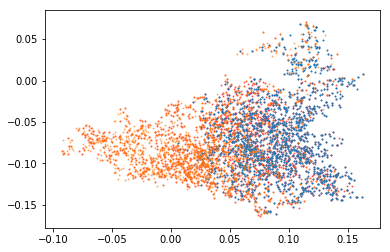

In [55]:
x = df2.x[df2.ext_id==214]
y = df2.y[df2.ext_id==214]
p.scatter(x, y, s=1, alpha=0.5, c='red')
x = df1.x[df1.ext_id==208]
y = df1.y[df1.ext_id==208]
p.scatter(x, y, s=1)
x = df1.x[df1.ext_id==212]
y = df1.y[df1.ext_id==212]
p.scatter(x, y, s=1, alpha=0.5)
p.show()

### Comparion 1 and 3

In [21]:
tmp_com_13 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_3)
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com_13  = pd.read_csv(tmp_com_13, sep=' ', comment='#', names=hdr_com)

df = df_com_13
df

# Choose significant commonality
df[(df.percent_1==100) & (df.percent_2==100)] # NONE
# df[(df.percent_1 >= 70) & (df.percent_2 >= 70)] # NONE
# df[(df.percent_1 >= 50) & (df.np_2!=85540)] # Some
# df[(df.percent_2 >= 50)]

# How many stars are in common between df1 and df3?
# a, b, c = len(df1), len(df3), len(intersect1d(df1.p_id, df3.p_id))
# c/a*100, c/b*100
# a,b

,sub_id_1,sub_id_2,np_1,np_2,np_common,percent_1,percent_2


In [75]:
len(df1),len(df3), len(df2),len(df4)

(11332, 96744, 11353, 93836)

### Comparion 1 and 4

In [23]:
tmp_com_14 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_4)
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com  = pd.read_csv(tmp_com_14, sep=' ', comment='#', names=hdr_com)

# choose significant commonality
df_com[(df_com.percent_1 >= 70) & (df_com.percent_2 >= 70)]
# df_com[(df_com.percent_1 >= 50) & (df_com.percent_2 >= 50)]
# df_com[(df_com.percent_1 >= 30) & (df_com.percent_2 >= 30)]

# arr14 = df_com_14.sub_id_1[(df_com_14.percent_1 > 50) & (df_com_14.percent_2 > 50)].values

,sub_id_1,sub_id_2,np_1,np_2,np_common,percent_1,percent_2


### Comparion 2 and 3

In [ ]:
tmp_com_23 = os.path.join(varyfb + 'common-' + name_2 + '-' + name_3)
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com  = pd.read_csv(tmp_com_23, sep=' ', comment='#', names=hdr_com)

#choose significant commonality
df_com[(df_com.percent_1 >= 70) & (df_com.percent_2 >= 70)]
# df_com[(df_com.percent_1 >= 50) & (df_com.percent_2 >= 50)]
# df_com[(df_com.percent_1 >= 30) & (df_com.percent_2 >= 30)]

# arr23 = df_com.sub_id_1[(df_com.percent_1 > 50) & (df_com.percent_2 > 50)].values

### Comparion 2 and 4

In [89]:
tmp_com_24 = os.path.join(varyfb + 'common-' + name_2 + '-' + name_4)
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com_24  = pd.read_csv(tmp_com_24, sep=' ', comment='#', names=hdr_com)
df = df_com_24
df

#choose significant commonality
# df[(df.percent_1==100) & (df.percent_2==100)] #NONE
# df[(df.percent_1 >= 70) & (df.percent_2 >= 70)] #NONE
# df[(df.percent_1 >= 50) & (df.percent_2 >= 50)]

# How many stars are in common between df2 and df4?
a, b, c = len(df2), len(df4), len(intersect1d(df2.p_id, df4.p_id))
c/a*100, c/b*100
a,b,c

(11353, 93836, 10353)

### Comparion 3 and 4

In [27]:
tmp_com_34 = os.path.join(varyfb + 'common-' + name_3 + '-' + name_4)
hdr_com = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'] #substructure ID, number of particle
df_com_34  = pd.read_csv(tmp_com_34, sep=' ', comment='#', names=hdr_com)
df_com_34

#choose significant commonality
df_com_34[(df_com_34.percent_1 == 100) & (df_com_34.percent_2 == 100)]
# df_com_34[(df_com_34.percent_1 >= 70) & (df_com_34.percent_2 >= 70)]
# df_com_34[(df_com_34.percent_1 >= 50) & (df_com_34.percent_2 >= 50)]
# df_com[(df_com.percent_1 >= 30) & (df_com.percent_2 >= 30)]
# df_com_34[df_com_34.np_1!=85540]

# arr34 = df_com.sub_id_1[(df_com.percent_1 > 50) & (df_com.percent_2 > 50)].values

,sub_id_1,sub_id_2,np_1,np_2,np_common,percent_1,percent_2
0,0,1,18,18,18,100,100


In [28]:
tmp_com_34

'/net/virgo01/data/users/virgini/rockstar/RC3/output/common-b20-f40-b20-f80'

In [25]:
# How many stars are in common between df3 and df4?
a, b, c = len(df3), len(df4), len(intersect1d(df3.p_id, df4.p_id))
c/a*100, c/b*100 

(96.29331017944264, 99.2774628074513)

### Final result: List of substructures that have high confidence (always appear in every run)

In [100]:
arr12 = df_com_12.sub_id_1[(df_com_12.percent_1 > 50) & (df_com_12.percent_2 > 50)].values
arr13 = df_com_13.sub_id_1[(df_com_13.percent_1 > 50) & (df_com_13.percent_2 > 50)].values
arr14 = df_com_14.sub_id_1[(df_com_14.percent_1 > 50) & (df_com_14.percent_2 > 50)].values

In [101]:
idh = intersect1d(intersect1d(arr12, arr13), intersect1d(arr13, arr14)) #index for high confidence

In [102]:
idh

array([145])

## Get the list of particle ID in each high-confidence substructure
##### By using the same tree as before, we will try to get the list of particle ID in each high-confidence subs

In [105]:
# =====================
# create a single file
# =====================

output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/high-confidence'
with open(output, 'w') as f:
    writer = csv.writer(f, delimiter=' ', lineterminator='\n')
    writer.writerow(['#sub_id_1', 'p_id'])
    f.close()

# =================================================================================
# The 3 levels tree to find any substructures that always exist in 4 different set
# =================================================================================

for i in idh:

    # select substructure-ID which more than 50% of stars intersect with each other
    ids2 = int(df_com_12.sub_id_2[(df_com_12.sub_id_1==i) & (df_com_12.percent_1 > 50) & (df_com_12.percent_2 > 50)])
    ids3 = int(df_com_13.sub_id_2[(df_com_13.sub_id_1==i) & (df_com_13.percent_1 > 50) & (df_com_13.percent_2 > 50)])
    ids4 = int(df_com_14.sub_id_2[(df_com_14.sub_id_1==i) & (df_com_14.percent_1 > 50) & (df_com_14.percent_2 > 50)])

    # array that contains particle-ID in each selected substructure-ID
    arr1 = array(df1.p_id[df1.ext_id==i])
    arr2 = array(df2.p_id[df2.ext_id==ids2])
    arr3 = array(df3.p_id[df3.ext_id==ids3])
    arr4 = array(df4.p_id[df4.ext_id==ids4])

    # first level tree of intersection
    idp12 = intersect1d(arr1, arr2)
    idp13 = intersect1d(arr1, arr3)
    idp14 = intersect1d(arr1, arr4)

    # second level tree of intersection
    idp123 = intersect1d(idp12, idp13)
    idp134 = intersect1d(idp12, idp14)

    # third level tree of intersection
    idp1234 = intersect1d(idp123, idp134)
    
    with open(output, 'a') as f:
        writer = csv.writer(f, delimiter=' ', lineterminator='\n')
        for j in arange(len(idp1234)):
            writer.writerow([i, idp1234[j]])
        f.close()  

# Plot stars around the area of 3 open clusters [DONE]

## 1. NGC 3235

In [ ]:
ra  = math.radians(166.5)
dec = math.radians(-58.73)
d   = 492

x1 = (d*math.cos(dec)*math.cos(ra))*1e-3
y1 = (d*math.cos(dec)*math.sin(ra))*1e-3
z1 = (d*math.sin(dec))*1e-3

x1,y1,z1

In [ ]:
# Plot stars around the area of NGC 3235

tmp_input = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5'
df_input  = pd.read_csv(tmp_input, sep=' ', index_col=False)

r_pc  = 50 
r_kpc = r_pc*1e-3

NGC3235 = (df_input.x >= (x1-r_kpc)) & (df_input.x <= (x1+r_kpc)) & \
          (df_input.y >= (y1-r_kpc)) & (df_input.y <= (y1+r_kpc)) & \
          (df_input.z >= (z1-r_kpc)) & (df_input.z <= (z1+r_kpc))

df = df_input[NGC3235].reset_index()

tmp_3235 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/NGC3235.pdf'

with PdfPages(tmp_3235) as pdf:

    fig = p.figure(figsize=(17,8))
    
    gs = p.GridSpec(1,2)
    p.subplot(gs[0])
    p.scatter(x1,y1, c='red', marker='x', s=100)
    p.scatter(df.x, df.y)
    
    for i in range(len(df)):
        p.arrow(df.x[i], df.y[i], df.vx[i]/1e4, df.vy[i]/1e4, width=0, head_width=0.0005, fc='black')
    
    p.xlabel('x [kpc]')
    p.ylabel('y [kpc]')
    p.title('NGC3235 (new data file)', loc='left')
    p.title('Size = %s pc' %r_pc, loc='right')
    
    p.subplot(gs[1])
    p.scatter(z1,y1, c='red', marker='x', s=100)
    p.scatter(df.z, df.y)
    
    for i in range(len(df)):
        p.arrow(df.z[i], df.y[i], df.vz[i]/1e4, df.vy[i]/1e4, width=0, head_width=0.0005, fc='black')
    
    p.xlabel('z [kpc]')
    p.ylabel('y [kpc]')
    
    pdf.savefig(fig)
    p.show()

## 2. NGC 2422

In [ ]:
ra  = radians(114.15)
dec = radians(-14.48)
d   = 491

x2 = d*math.cos(dec)*math.cos(ra)*1e-3
y2 = d*math.cos(dec)*math.sin(ra)*1e-3
z2 = d*math.sin(dec)*1e-3

x2,y2,z2

In [ ]:
# Plot stars around the area of NGC 2422

tmp_input = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5'
df_input  = pd.read_csv(tmp_input, sep=' ', index_col=False)

r_pc  = 300 
r_kpc = r_pc*1e-3

NGC2422 = (df_input.x >= (x2-r_kpc)) & (df_input.x <= (x2+r_kpc)) & \
          (df_input.y >= (y2-r_kpc)) & (df_input.y <= (y2+r_kpc)) & \
          (df_input.z >= (z2-r_kpc)) & (df_input.z <= (z2+r_kpc))

df = df_input[NGC2422].reset_index()

tmp_2422 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/NGC2422.pdf'

with PdfPages(tmp_2422) as pdf:

    p.figure(figsize=(17,8))
    gs = p.GridSpec(1,2)
    
    p.subplot(gs[0])
    p.scatter(x2,y2, c='red', marker='x', s=100)
    p.scatter(df.x, df.y)
    
    for i in range(len(df)):
        p.arrow(df.x[i], df.y[i], df.vx[i]/1e4, df.vy[i]/1e4, width=0, head_width=0.0005, fc='black')
    
    p.xlabel('x [kpc]')
    p.ylabel('y [kpc]')
    p.title('NGC2422 (new data file)', loc='left')
    p.title('Size = %s pc' %r_pc, loc='right')
    
    p.subplot(gs[1])
    p.scatter(z2,y2, c='red', marker='x', s=100)
    p.scatter(df.z, df.y)
    
    for i in range(len(df)):
        p.arrow(df.z[i], df.y[i], df.vz[i]/1e4, df.vy[i]/1e4, width=0, head_width=0.0005, fc='black')
    
    p.xlabel('z [kpc]')
    p.ylabel('y [kpc]')
    
    pdf.savefig()
    p.close()

## 3. NGC 6405

In [ ]:
ra  = radians(265.08)
dec = radians(-32.20)
d   = 487

x3 = d*math.cos(dec)*math.cos(ra)*1e-3
y3 = d*math.cos(dec)*math.sin(ra)*1e-3
z3 = d*math.sin(dec)*1e-3
x3,y3,z3

In [ ]:
# Plot stars around the area of NGC 6405

tmp_input = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5'
df_input  = pd.read_csv(tmp_input, sep=' ', index_col=False)

r_pc  = 50 
r_kpc = r_pc*1e-3

NGC6405 = (df_input.x >= (x3-r_kpc)) & (df_input.x <= (x3+r_kpc)) & \
          (df_input.y >= (y3-r_kpc)) & (df_input.y <= (y3+r_kpc)) & \
          (df_input.z >= (z3-r_kpc)) & (df_input.z <= (z3+r_kpc))

df = df_input[NGC6405].reset_index()

tmp_6405 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/NGC6405.pdf'

with PdfPages(tmp_6405) as pdf:
    
    fig = p.figure(figsize=(17,8))
    gs = p.GridSpec(1,2)
    
    p.subplot(gs[0])
    p.scatter(x3,y3, c='red', marker='x', s=100)
    p.scatter(df.x, df.y)
    
    for i in range(len(df)):
        p.arrow(df.x[i], df.y[i], df.vx[i]/1e4, df.vy[i]/1e4, width=0, head_width=0.0005, fc='black')
        
    p.xlabel('x [kpc]')
    p.ylabel('y [kpc]')
    p.title('NGC6405 (new data file)', loc='left')
    p.title('Size = %s pc' %r_pc, loc='right')
    
    p.subplot(gs[1])
    p.scatter(z3,y3, c='red', marker='x', s=100)
    p.scatter(df.z, df.y)
    
    for i in range(len(df)):
        p.arrow(df.z[i], df.y[i], df.vz[i]/1e4, df.vy[i]/1e4, width=0, head_width=0.0005, fc='black')
        
    p.xlabel('z [kpc]')
    p.ylabel('y [kpc]')
    
    pdf.savefig(fig)
    p.close()

# Plot of all substructures in space (with new data file)

In [ ]:
sub_  = ['b07-f13-n5-t70-halo', 'b07-f83-n5-t70-halo', 'b24-f44-n5-t70-halo', 'b24-f82-n5-t70-halo']
name_ = [name_1, name_2, name_3, name_4]

varyfb  = '/net/virgo01/data/users/virgini/rockstar/RC3/output/'
tmp_sub = ['tmp_sub1', 'tmp_sub2', 'tmp_sub3', 'tmp_sub4']
hdr_sub = ['id', 'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax', 'vrms',\
           'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'E', 'Spin', \
           'PosUncertainty', 'VelUncertainty', 'bulk_vx', 'bulk_vy', 'bulk_vz',\
           'BulkVelUnc', 'n_core', 'm200b', 'm200c', 'm500c', 'm2500c',\
           'Xoff', 'Voff', 'spin_bullock', 'b_to_a', 'c_to_a', \
           'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', \
           'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'Rs', 'Rs_Klypin', 'T/|U|',\
           'M_pe_Behroozi', 'M_pe_Diemer', 'idx', 'i_so', 'i_ph', 'num_cp', 'mmetric']
df_sub  = ['df_sub1', 'df_sub2', 'df_sub3', 'df_sub4']

for i in range(4):
    tmp_sub[i] = os.path.join(varyfb + sub_[i])
    df_sub[i]  = pd.read_csv(tmp_sub[i], comment='#', sep=' ', names=hdr_sub, \
                 usecols=['x', 'y', 'z', 'vx', 'vy', 'vz'])

In [ ]:
tmp_all = os.path.join(varyfb+'all_sub'+'.pdf')

with PdfPages(tmp_all) as pdf:
    
    for i in range(4):
        
        fig = p.figure(figsize=(17,9))
        gs = p.GridSpec(1,2)
        FOF_b = name_[i][0].replace('b', '3D FOF b : ')+str(int(str(int(name_[i][1]))+str(int(name_[i][2])))/100)
        FOF_f = name_[i][4].replace('f', '3D FOF f  : ')+str(int(str(int(name_[i][5]))+str(int(name_[i][6])))/100)
        
        p.subplot(gs[0])
        p.scatter(df_sub[i].x, df_sub[i].y, s=20)
        p.scatter(0,0, c='red', s=30)
        
        for k in range(len(df_sub[i])):
            p.arrow(df_sub[i].x[k], df_sub[i].y[k], df_sub[i].vx[k]*5e-4, df_sub[i].vy[k]*5e-4,\
                    width=0, head_width=0.005, fc='black')
        
        FOF_b = name_[i][0].replace('b', '3D FOF b : ')+str(int(str(int(name_[i][1]))+str(int(name_[i][2])))/100)
        FOF_f = name_[i][4].replace('f', '3D FOF f  : ')+str(int(str(int(name_[i][5]))+str(int(name_[i][6])))/100)        
        
        p.title(FOF_b +'\n'+ FOF_f +'\n'+ 'Number of substructures : %s' %len(df_sub[i]) +'\n',\
                fontsize=10, loc='left')
        p.xlabel('x [kpc]')
        p.ylabel('y [kpc]')
        p.xlim(-0.3, 0.6)
        p.ylim(-0.7, 0.2)
        
        p.subplot(gs[1])
        p.scatter(df_sub[i].z, df_sub[i].y, s=20)
        p.scatter(0,0, c='red', s=30)
        
        
        for k in range(len(df_sub[i])):
            p.arrow(df_sub[i].z[k], df_sub[i].y[k], df_sub[i].vz[k]*5e-4, df_sub[i].vy[k]*5e-4,\
                    width=0, head_width=0.005, fc='black')

        p.title('New data file \n', loc='right', fontsize=15)
        p.xlabel('z [kpc]')
        p.ylabel('y [kpc]')
        p.xlim(-0.5, 0.4)
        p.ylim(-0.7, 0.2)
        
        gs.tight_layout(fig, rect=[0.05,0.05,0.95,0.95])
        
        pdf.savefig(fig)
        p.close()
        
    p.show()

In [ ]:
dr[0]

# Find the tree

In [95]:
df1 = df1
df2 = df2
name_1 = name_1
name_2 = name_2
output_1 = output_1
output_2 = output_2
tmp_tree = tmp_tree_12

## 1. Create data file

In [102]:
tmp_12 = os.path.join(varyfb + 'common-' + name_1 + '-' + name_2)
with open(tmp_12, 'w') as common:
    wr = csv.writer(common, delimiter=' ', lineterminator='\n')
    wr.writerow(['#output_1:', output_1])
    wr.writerow(['#output_2:', output_2])
    wr.writerow(['#sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2'])
    for i in tqdm(range(max(df1.ext_id)+1), desc='Loading...'):
        for j in range(max(df2.ext_id)+1):
            arr1 = array(df1.p_id[df1.ext_id == i])
            arr2 = array(df2.p_id[df2.ext_id == j])
            if len(intersect1d(arr1, arr2)) != 0:
                np_common = len(intersect1d(arr1, arr2))
                percent_1 = int((np_common/len(arr1))*100)
                percent_2 = int((np_common/len(arr2))*100)
                wr.writerow([i, j, len(arr1), len(arr2), np_common, percent_1, percent_2])
    common.close()


Loading...: 100%|██████████| 244/244 [01:00<00:00,  3.99it/s]


In [103]:
arr1 = array(df1.p_id[df1.ext_id == 4])
arr2 = array(df2.p_id[df2.ext_id == 4])
intersect1d(arr1, arr2)

array([ 771,  776,  782,  784,  786,  790,  931,  932,  937,  987,  989,
       1008])

In [98]:
arr1

array([ 989,  771,  987,  937,  782, 1008,  776,  786,  790,  784,  931,
        932])

In [99]:
arr2

array([ 989,  771,  987,  937,  782, 1008,  776,  786,  790,  784,  931,
        932])

In [100]:
len(df1.p_id)-len(unique(df1.p_id))

0

## 2. Information

In [104]:
hdr_12 = ['sub_id_1', 'sub_id_2', 'np_1', 'np_2', 'np_common', 'percent_1', 'percent_2']
df12  = pd.read_csv(tmp_12, sep=' ', comment='#', names=hdr_12)

print('Output 1:', output_1)
print('Output 2:', output_2)
print('Number of substructures:', max(df12.sub_id_1)+1, max(df12.sub_id_2)+1) #the least number is the parent
print('Maximum number of stars:', max(df12.np_1), max(df12.np_2))

Output 1: b05-f40-n10-t70
Output 2: b05-f80-n10-t70
Number of substructures: 244 249
Maximum number of stars: 1881 2914


In [105]:
n_same = len(unique(df12.sub_id_2[(df12.percent_1 == 100) & (df12.percent_2 == 100)]))
n_half = len(unique(df12.sub_id_2[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]))
n_less = len(unique(df12.sub_id_2[(df12.percent_2 <= 50)]))
print('Number of substructures that are exactly the same: %s' %n_same)
print('Number of substructures that have intersection more than half: %s' %n_half) 
print('Number of substructures that can be ignored: %s' %n_less)
print('Total:', n_same + n_half + n_less)

#this number is not the same as the total substructure, because there might be some substructures that has more than half
#to sub_A and less than half to sub_B, so they belong to both 'half' and 'less', thus they are counted twice.

Number of substructures that are exactly the same: 225
Number of substructures that have intersection more than half: 11
Number of substructures that can be ignored: 14
Total: 250


In [106]:
n_parent = len(unique(df12.sub_id_1[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]))
n_child  = len(unique(df12.sub_id_2[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]))
print('Number of parent substructures: %s' %n_parent)
print('Number of child  substructures: %s' %n_child)

Number of parent substructures: 6
Number of child  substructures: 11


In [107]:
(df12[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)])

,sub_id_1,sub_id_2,np_1,np_2,np_common,percent_1,percent_2
202,201,205,25,17,16,64,94
207,203,209,68,58,49,72,84
214,206,207,20,13,8,40,61
242,212,210,1881,200,196,10,98
243,212,211,1881,93,92,4,98
245,212,213,1881,104,61,3,58
247,212,215,1881,66,43,2,65
250,212,218,1881,13,8,0,61
255,214,208,277,16,10,3,62
259,214,217,277,45,26,9,57


In [108]:
array_same = unique(df12.sub_id_2[(df12.percent_1 == 100) & (df12.percent_2 == 100)])
array_same.shape

(225,)

In [109]:
array_half = unique(df12.sub_id_1[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)])
array_half.shape

(6,)

In [110]:
array_less = unique(df12.sub_id_2[(df12.percent_2 <= 50)])
array_less.shape

(14,)

In [ ]:
intersect1d(array_half, array_less)

## 3. Plot parent and children (complete)

In [117]:
df12_parent = df12[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]
df12_parent = df12_parent[df12_parent.np_1 > df12_parent.np_2]


with PdfPages(tmp_tree) as pdf:

    for i in tqdm(unique(df12_parent.sub_id_1), desc='Loading...'):

        fig = p.figure(figsize=(15,19))
        fig.suptitle('Parent and Children Substructures', fontsize=20, y=0.94)
        
        gs = p.GridSpec(nrows=3, ncols=2)
        
        #-----------------------#
        #  Parent and Children  #
        #-----------------------#
        
        p.subplot(gs[0])
        parent = df1[df1.ext_id==i].reset_index()
        np_1 = int(unique(df12_parent.np_1[df12_parent.sub_id_1==i]))
        p.scatter(parent.x, parent.y, s=5)

        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            p.scatter(child.x[member==True], child.y[member==True], s=5, 
                      label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))
            p.scatter(child.x, child.y, s=5, visible=False)
            
        p.ylabel('y [kpc]')

        p.subplot(gs[1])
        p.scatter(parent.z, parent.y, s=5, label='Parent %s (%s stars)' %(i, np_1))

        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            p.scatter(child.z[member==True], child.y[member==True], s=5,
                      label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))
            p.scatter(child.z, child.y, s=5, label=None, visible=False)

        p.legend(bbox_to_anchor=(1.01, 1), ncol=1, frameon=False, labelspacing=0.8)
        
        #-----------------------------#
        #  Children (parent's member) #
        #-----------------------------#
        
        p.subplot(gs[2])
        np_1 = int(unique(df12_parent.np_1[df12_parent.sub_id_1==i]))
        p.scatter(parent.x, parent.y, s=5, visible=False)
    
        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            p.scatter(child.x[member==True], child.y[member==True], s=5, 
                      label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))
            p.scatter(child.x, child.y, s=5, visible=False)

        p.ylabel('y [kpc]')

        p.subplot(gs[3])
        np_1 = int(unique(df12_parent.np_1[df12_parent.sub_id_1==i]))
        p.scatter(parent.z, parent.y, s=5, visible=False)

        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            p.scatter(child.z[member==True], child.y[member==True], s=5,
                      label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))
            p.scatter(child.z, child.y, s=5, visible=False)
            
        #-------------------------#
        #  Children (all member)  #
        #-------------------------#
        
        p.subplot(gs[4])
        np_1 = int(unique(df12_parent.np_1[df12_parent.sub_id_1==i]))
        p.scatter(parent.x, parent.y, s=5, visible=False)
    
        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            p.scatter(child.x, child.y, s=5, label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))
            
        p.xlabel('x [kpc]')
        p.ylabel('y [kpc]')

        p.subplot(gs[5])
        np_1 = int(unique(df12_parent.np_1[df12_parent.sub_id_1==i]))
        p.scatter(parent.z, parent.y, s=5, visible=False)

        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            p.scatter(child.z, child.y, s=5, label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))

        p.xlabel('z [kpc]')
        
        gs.tight_layout(fig, rect=[0.05,0.05,0.8,0.9])
        
        pdf.savefig()
        p.close()

print('finish')

Loading...: 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

finish


## 4. Plot parent and children (best)

In [111]:
df12_parent = df12[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]
df12_parent = df12_parent[df12_parent.np_1 > df12_parent.np_2]
unique(df12_parent.sub_id_1)

array([201, 203, 206, 212, 214, 215])

In [112]:
df12_parent = df12[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]

In [113]:
df12_parent.percent_2[df12_parent.sub_id_2==j]

Series([], Name: percent_2, dtype: int64)

In [125]:
df12_parent = df12[(df12.percent_1 != 100) & (df12.percent_2 != 100) & (df12.percent_2 > 50)]
# df12_parent = df12_parent[df12_parent.np_1 > df12_parent.np_2]


with PdfPages(tmp_tree_12) as pdf:

    for i in tqdm(unique(df12_parent.sub_id_1), desc='Loading...'):

        fig = p.figure(figsize=(15,7))
        fig.suptitle('Parent and Children Substructures (parameter : %s and %s)' 
                     %(name_1, name_2), fontsize=20, x=0.45, y=0.94)
        
        gs = p.GridSpec(nrows=1, ncols=2)
        
        #-----------------------#
        #  Parent and Children  #
        #-----------------------#
        
        p.subplot(gs[0])
        parent = df1[df1.ext_id==i].reset_index()
        np_1 = int(unique(df12_parent.np_1[df12_parent.sub_id_1==i]))
        pos = sqrt(parent.x**2+parent.y**2+parent.z**2)
        vel = sqrt(parent.vx**2+parent.vy**2+parent.vz**2)
        p.scatter(pos, vel, s=5, c='antiquewhite')
        p.xlabel('x [kpc]')
        p.ylabel('y [kpc]')

        for j in df12_parent.sub_id_2[df12_parent.sub_id_1==i]:
            child  = df2[df2.ext_id==j].reset_index()
            common = intersect1d(parent.p_id,child.p_id)
            member = in1d(child.p_id,parent.p_id)
            np_2 = int(df12_parent.np_common[df12_parent.sub_id_2==j])
            per_2 = int(df12_parent.percent_2[df12_parent.sub_id_2==j])
            pos = sqrt(child.x**2+child.y**2+child.z**2)
            vel = sqrt(child.vx**2+child.vy**2+child.vz**2)
            p.scatter(pos[member==True], vel[member==True], s=5,
                      label='Child %s (%s stars, %s%%)' %(j, np_2, per_2))

        p.legend(bbox_to_anchor=(1.01, 1), ncol=1, frameon=False, labelspacing=0.8)
        
        gs.tight_layout(fig, rect=[0.05,0.05,0.8,0.9])
        
        pdf.savefig()
        p.close()

print('finish')

Loading...: 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

finish
